# **Social Media Clustering & Prediction**

**📘 Executive Summary**

This analysis explores how social media usage among students aged 16–25 impacts mental health, academic performance, sleep, and relationships. Using a multi-country dataset, we applied both statistical and machine learning techniques.

**📈 Techniques Used:**

Exploratory Data Analysis (EDA)

Correlation heatmap

KMeans clustering

Country-wise comparison

Logistic regression classification

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data=pd.read_csv("/content/Students Social Media Addiction.csv")
data

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [51]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl


**✅ Data Quality Check**


Before diving into analysis, it's essential to check for missing values, duplicates, and data types to ensure clean and reliable insights.

We inspect:

Null or missing values

Duplicate entries

Correct data types for each feature

In [52]:
data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [53]:
data.duplicated().sum()

np.int64(0)

In [54]:
data['Student_ID'].duplicated().sum()

np.int64(0)

In [55]:
data.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [56]:
data=data.drop(columns=['Student_ID'],errors='ignore')

In [57]:
numerical_features= []
Categorical_features=[]

for feature in data.columns:
   if data[feature].nunique()>10:
    numerical_features.append(feature)
   else:
    Categorical_features.append(feature)

In [58]:
numerical_features= []
Categorical_features=[]

for feature in data.columns:
   if data[feature].nunique()>10:
    numerical_features.append(feature)
   else:
    Categorical_features.append(feature)

display(numerical_features)


['Country',
 'Avg_Daily_Usage_Hours',
 'Most_Used_Platform',
 'Sleep_Hours_Per_Night']

In [59]:
display(Categorical_features)

['Age',
 'Gender',
 'Academic_Level',
 'Affects_Academic_Performance',
 'Mental_Health_Score',
 'Relationship_Status',
 'Conflicts_Over_Social_Media',
 'Addicted_Score']

In [60]:
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                      'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

categorical_features = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                        'Affects_Academic_Performance', 'Relationship_Status']

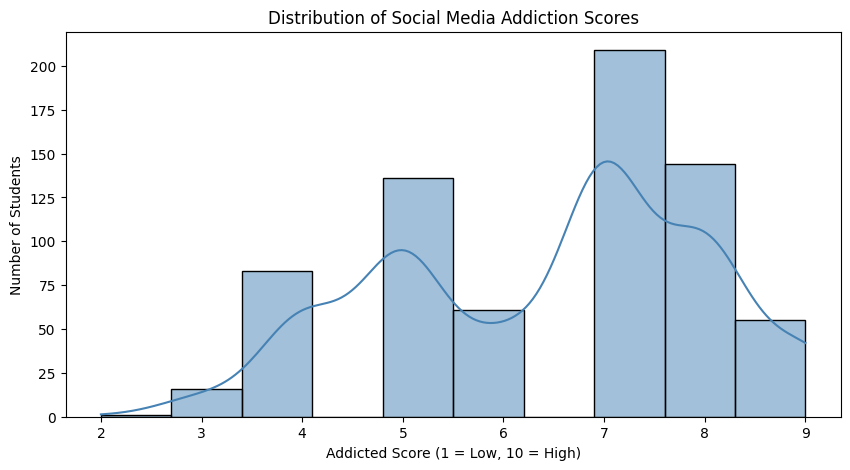

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Addicted_Score'],bins=10, kde=True, color="steelblue")
plt.title("Distribution of Social Media Addiction Scores")
plt.xlabel("Addicted Score (1 = Low, 10 = High)")
plt.ylabel("Number of Students")
plt.show()


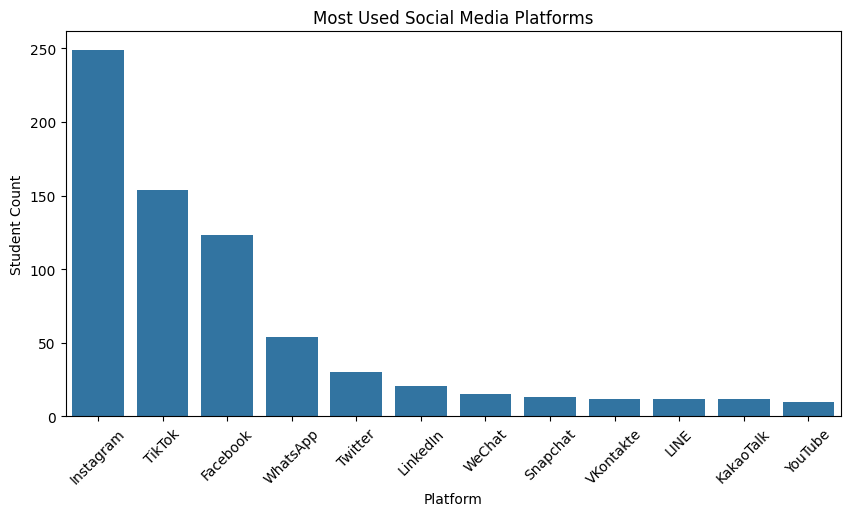

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Most_Used_Platform', order=data['Most_Used_Platform'].value_counts().index)
plt.title("Most Used Social Media Platforms")
plt.xlabel("Platform")
plt.ylabel("Student Count")
plt.xticks(rotation=45)
plt.show()

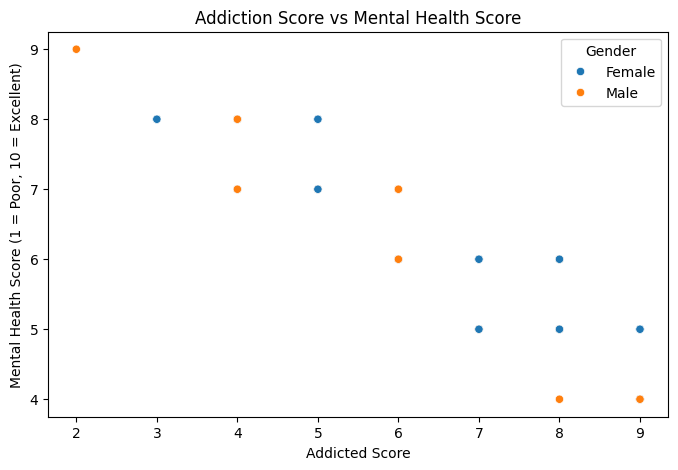

In [63]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Addicted_Score', y='Mental_Health_Score', hue='Gender')
plt.title("Addiction Score vs Mental Health Score")
plt.xlabel("Addicted Score")
plt.ylabel("Mental Health Score (1 = Poor, 10 = Excellent)")
plt.legend(title="Gender")
plt.show()

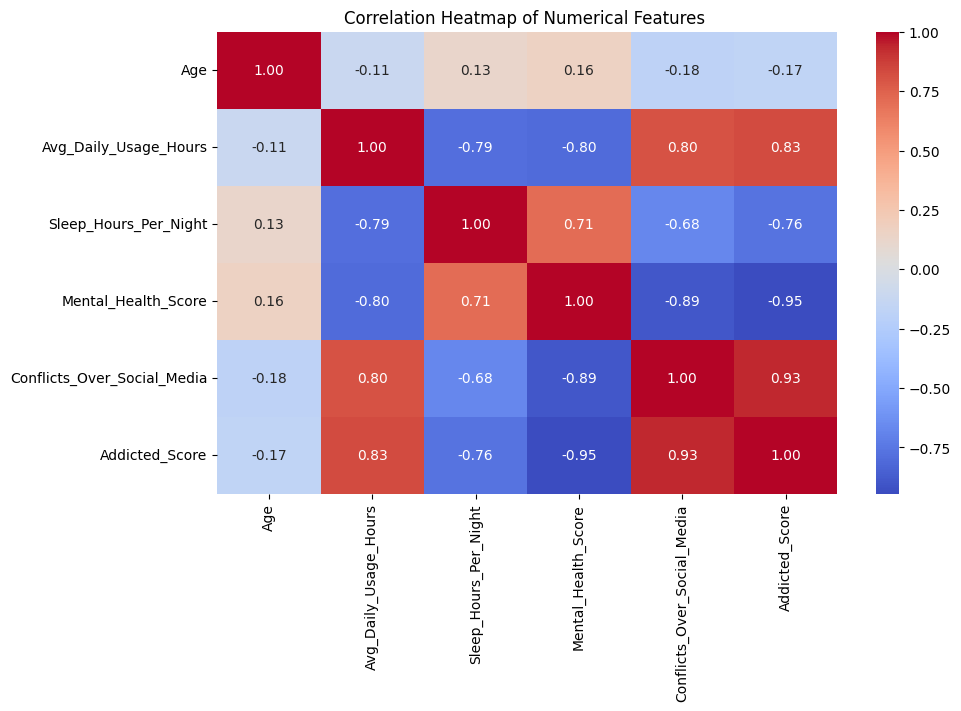

In [64]:
plt.figure(figsize=(10,6))
corr_matrix=data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features ")
plt.show()

**Clustering Analysis**

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
x = data[features].copy()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Kmeans =KMeans(n_clusters=3, random_state=42, n_init=10)

data['Cluster'] = Kmeans.fit_predict(x_scaled)

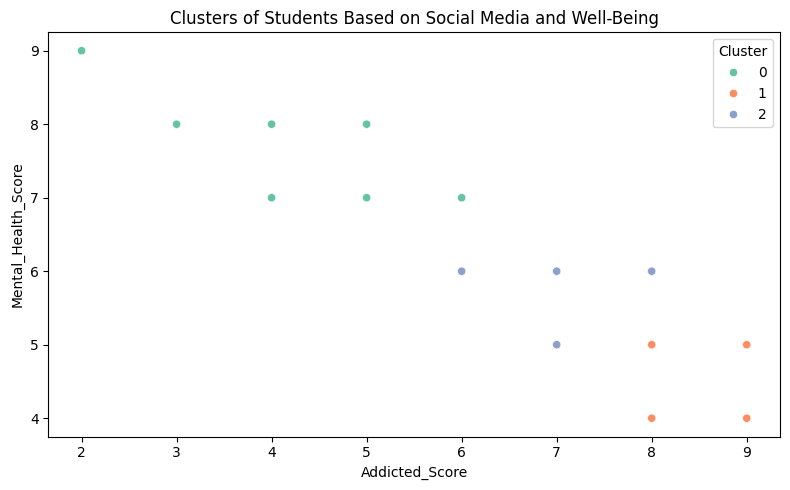

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Addicted_Score', y='Mental_Health_Score', hue='Cluster', palette='Set2')
plt.title("Clusters of Students Based on Social Media and Well-Being")
plt.xlabel("Addicted_Score")
plt.ylabel("Mental_Health_Score")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

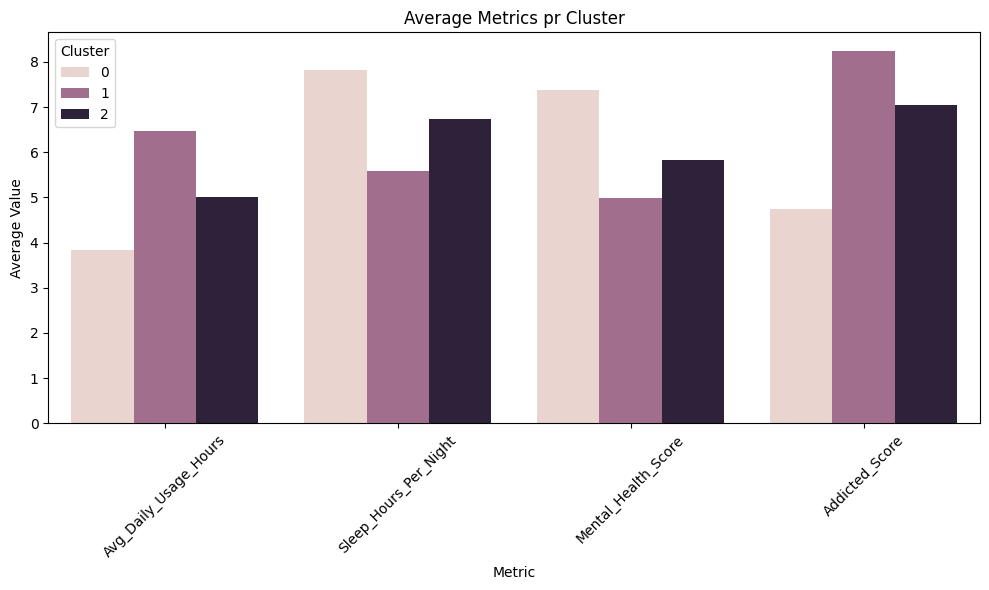

In [67]:
cluster_means= data.groupby('Cluster')[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night','Mental_Health_Score', 'Addicted_Score']].mean().reset_index()
cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Metric', value_name='Average')
plt.figure(figsize=(10, 6))
sns.barplot(data= cluster_means_melted,x='Metric',y='Average',hue='Cluster')
plt.title("Average Metrics pr Cluster")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Country-Wise Analysis of Social Media Usage**

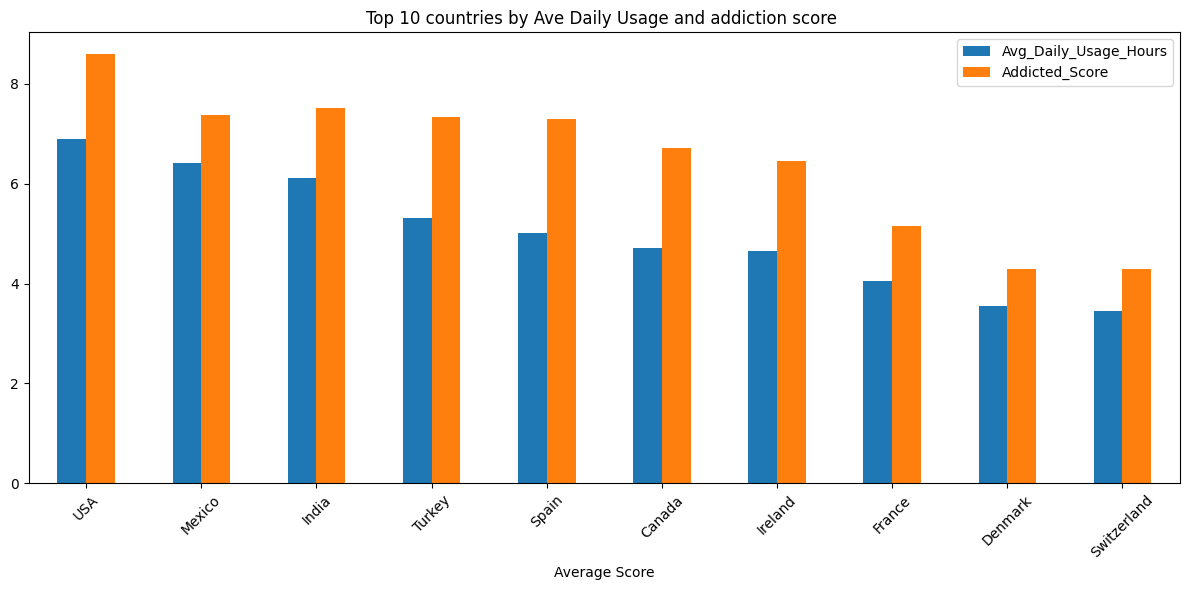

In [68]:
top_contries = data['Country'].value_counts().head(10).index
country_data = data[data['Country'].isin(top_contries)]
country_avg = country_data.groupby('Country')[['Avg_Daily_Usage_Hours', 'Addicted_Score']].mean().sort_values(
    'Avg_Daily_Usage_Hours', ascending=False)
country_avg.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 countries by Ave Daily Usage and addiction score ")
plt.xlabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Predicting Academic Impact Using Logistic Regression**

**Predicting Academic Impact Using Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Encode target
data['Affects_Academic_Binary'] = data['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# Define features and target
features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score', 'Mental_Health_Score']
X = data[features]
y = data['Affects_Academic_Binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        87

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

 Confusion Matrix:
 [[53  1]
 [ 0 87]]


**Logistic Regression: Model Evaluation**

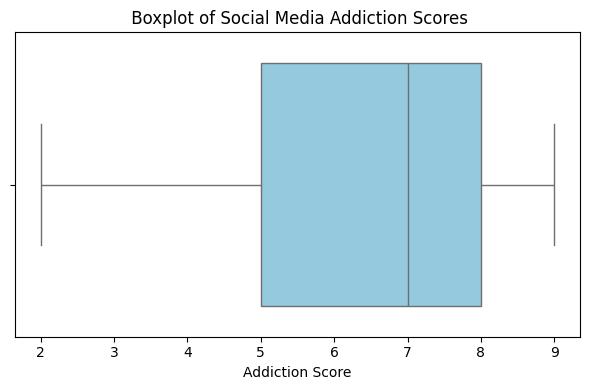

In [73]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Addicted_Score'], color='skyblue')
plt.title(" Boxplot of Social Media Addiction Scores")
plt.xlabel("Addiction Score")
plt.tight_layout()
plt.show()

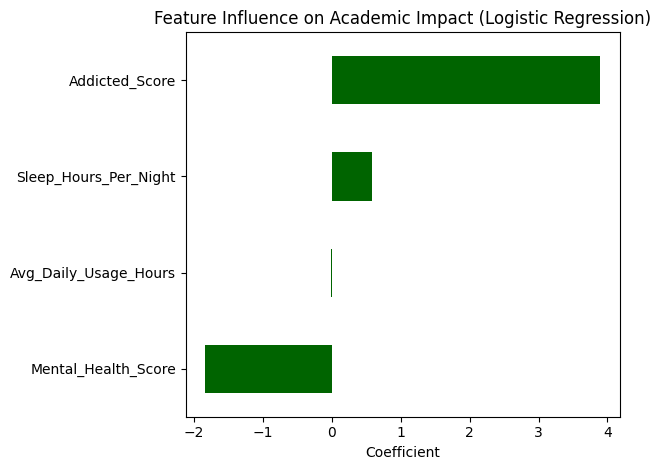

In [74]:
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', color='darkgreen')
plt.title("Feature Influence on Academic Impact (Logistic Regression)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()

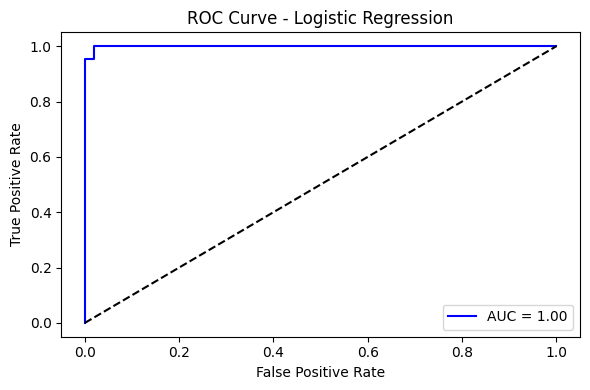

In [75]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()